# imports

In [1]:
import numpy as np

# value initialization

In [2]:
num_filters = 2
num_channels = 3
filter_height = 3
filter_width = 3

In [3]:
batch_size = 2
height = 5
width = 5

In [4]:
filter_h = 3
filter_w = 3
stride = 2
padding = 1

In [5]:
output_height = int((height - filter_h + 2 * padding) / stride + 1)
output_width = int((width - filter_w + 2 * padding) / stride + 1)

# matrices initialization

## weights

In [6]:
weights = np.random.randint(0,10,(num_filters, num_channels, filter_height, filter_width))

In [7]:
weights

array([[[[7, 3, 1],
         [2, 6, 7],
         [9, 8, 4]],

        [[9, 5, 0],
         [9, 1, 8],
         [9, 8, 2]],

        [[1, 4, 5],
         [6, 7, 8],
         [4, 6, 3]]],


       [[[5, 1, 8],
         [7, 6, 8],
         [5, 4, 0]],

        [[7, 0, 3],
         [8, 7, 2],
         [1, 8, 6]],

        [[2, 5, 1],
         [9, 2, 9],
         [6, 8, 4]]]])

In [8]:
weights_col = weights.reshape((num_filters, -1))

In [9]:
weights_col

array([[7, 3, 1, 2, 6, 7, 9, 8, 4, 9, 5, 0, 9, 1, 8, 9, 8, 2, 1, 4, 5, 6,
        7, 8, 4, 6, 3],
       [5, 1, 8, 7, 6, 8, 5, 4, 0, 7, 0, 3, 8, 7, 2, 1, 8, 6, 2, 5, 1, 9,
        2, 9, 6, 8, 4]])

In [10]:
weights_col.shape

(2, 27)

## bias

In [11]:
bias = np.random.randint(0,10,num_filters)

In [12]:
bias

array([9, 4])

In [13]:
bias_col = bias.reshape(-1,1)

In [14]:
bias_col

array([[9],
       [4]])

## input

In [15]:
X = np.random.randint(0, 10, (batch_size, num_channels, height, width))
X

array([[[[4, 1, 1, 5, 9],
         [1, 9, 9, 3, 9],
         [8, 7, 3, 2, 3],
         [1, 6, 2, 4, 9],
         [7, 9, 4, 3, 7]],

        [[4, 3, 9, 0, 9],
         [9, 8, 6, 5, 3],
         [5, 3, 5, 2, 9],
         [1, 6, 9, 2, 0],
         [5, 3, 1, 3, 2]],

        [[1, 4, 7, 5, 6],
         [3, 8, 9, 8, 4],
         [8, 8, 3, 0, 4],
         [6, 4, 8, 3, 1],
         [1, 2, 2, 3, 9]]],


       [[[7, 8, 7, 2, 2],
         [5, 5, 1, 3, 8],
         [7, 0, 7, 9, 3],
         [0, 7, 4, 3, 2],
         [6, 2, 6, 7, 8]],

        [[7, 6, 6, 6, 0],
         [1, 3, 1, 4, 3],
         [9, 5, 2, 8, 9],
         [7, 5, 5, 1, 3],
         [8, 2, 5, 7, 6]],

        [[4, 3, 5, 2, 1],
         [0, 7, 8, 6, 1],
         [1, 3, 8, 4, 1],
         [7, 3, 6, 8, 9],
         [1, 6, 5, 5, 2]]]])

# operations

## convolve using im2col

In [16]:
import utils

In [18]:
X_cols = utils.im2col(X, filter_h, filter_w, stride, padding)

In [19]:
X_cols

array([[0, 0, 0, 0, 0, 6, 0, 0, 7, 0, 0, 0, 0, 3, 9, 0, 0, 8],
       [0, 0, 0, 5, 7, 1, 4, 0, 8, 0, 0, 0, 0, 9, 3, 5, 9, 0],
       [0, 0, 0, 0, 6, 0, 0, 7, 0, 0, 0, 0, 3, 9, 0, 0, 8, 0],
       [0, 0, 3, 0, 6, 9, 0, 1, 1, 0, 2, 0, 0, 4, 4, 0, 2, 0],
       [6, 0, 4, 2, 0, 8, 8, 0, 8, 4, 8, 7, 8, 8, 1, 5, 6, 2],
       [0, 3, 0, 6, 9, 0, 1, 1, 0, 2, 0, 0, 4, 4, 0, 2, 0, 0],
       [0, 0, 6, 0, 0, 7, 0, 0, 0, 0, 3, 9, 0, 0, 8, 0, 0, 0],
       [5, 7, 1, 4, 0, 8, 0, 0, 0, 0, 9, 3, 5, 9, 0, 0, 0, 0],
       [0, 6, 0, 0, 7, 0, 0, 0, 0, 3, 9, 0, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 9, 1, 0, 4, 7, 0, 0, 0, 0, 0, 9, 0, 9, 9],
       [0, 0, 0, 8, 2, 1, 9, 7, 4, 0, 0, 0, 8, 4, 6, 0, 6, 4],
       [0, 0, 0, 9, 1, 0, 4, 7, 0, 0, 0, 0, 0, 9, 0, 9, 9, 0],
       [0, 8, 0, 0, 6, 7, 0, 8, 6, 0, 7, 8, 0, 9, 3, 0, 6, 5],
       [6, 7, 5, 1, 8, 0, 9, 9, 7, 3, 8, 8, 7, 4, 9, 5, 0, 2],
       [8, 0, 0, 6, 7, 0, 8, 6, 0, 7, 8, 0, 9, 3, 0, 6, 5, 0],
       [0, 9, 1, 0, 4, 7, 0, 0, 0, 0, 0, 9, 0, 9, 9, 0,

In [20]:
weights_col.shape

(2, 27)

In [21]:
X_cols.shape

(27, 18)

In [22]:
output_col = np.matmul(weights_col, X_cols) + bias_col

In [23]:
output_col

array([[260, 274, 177, 327, 514, 304, 177, 232, 267, 202, 324, 250, 267,
        573, 388, 219, 345, 122],
       [374, 318, 161, 415, 611, 288, 211, 336, 248, 238, 432, 210, 388,
        668, 381, 272, 387, 168]])

In [30]:
# output_im2col = output_col.reshape(batch_size, num_filters, output_height, output_width)

In [24]:
output_im2col = np.array(np.hsplit(output_col, batch_size)).reshape(batch_size, num_filters, output_height, output_width)

## convolve using loops

In [25]:
batch_size, num_channels, height, width = X.shape

In [26]:
num_filters, num_channels, filter_h, filter_w = weights.shape

In [28]:
output = np.zeros((batch_size, num_filters, output_height, output_width))

In [16]:
X_padded = np.pad(X, ((0, 0),
                        (0, 0),
                        (padding, padding),
                        (padding, padding)
                        ), 'constant')

In [17]:
X_padded

array([[[[0, 0, 0, 0, 0, 0, 0],
         [0, 4, 1, 1, 5, 9, 0],
         [0, 1, 9, 9, 3, 9, 0],
         [0, 8, 7, 3, 2, 3, 0],
         [0, 1, 6, 2, 4, 9, 0],
         [0, 7, 9, 4, 3, 7, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 4, 3, 9, 0, 9, 0],
         [0, 9, 8, 6, 5, 3, 0],
         [0, 5, 3, 5, 2, 9, 0],
         [0, 1, 6, 9, 2, 0, 0],
         [0, 5, 3, 1, 3, 2, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 1, 4, 7, 5, 6, 0],
         [0, 3, 8, 9, 8, 4, 0],
         [0, 8, 8, 3, 0, 4, 0],
         [0, 6, 4, 8, 3, 1, 0],
         [0, 1, 2, 2, 3, 9, 0],
         [0, 0, 0, 0, 0, 0, 0]]],


       [[[0, 0, 0, 0, 0, 0, 0],
         [0, 7, 8, 7, 2, 2, 0],
         [0, 5, 5, 1, 3, 8, 0],
         [0, 7, 0, 7, 9, 3, 0],
         [0, 0, 7, 4, 3, 2, 0],
         [0, 6, 2, 6, 7, 8, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 7, 6, 6, 6, 0, 0],
         [0, 1, 3, 1, 4, 3, 0]

In [18]:
X.shape

(2, 3, 5, 5)

In [19]:
X_padded.shape

(2, 3, 7, 7)

In [30]:
bias

array([3, 2])

In [25]:
biases = bias

In [26]:
biases

array([9, 4])

In [29]:
output.shape

(2, 2, 3, 3)

In [30]:
for sample_index in range(batch_size):
            for filter_index in range(num_filters):
                for h in range(output_height):
                    for w in range(output_width):
                        output[sample_index, filter_index, h, w] = np.sum(
                            X_padded[sample_index,
                                         :,
                                         h * stride:h * stride + filter_height,
                                         w * stride:w * stride + filter_width
                                         ] * weights[filter_index]
                        ) + biases[filter_index]

In [34]:
output

array([[[[260., 274., 177.],
         [327., 514., 304.],
         [177., 232., 267.]],

        [[374., 318., 161.],
         [415., 611., 288.],
         [211., 336., 248.]]],


       [[[202., 324., 250.],
         [267., 573., 388.],
         [219., 345., 122.]],

        [[238., 432., 210.],
         [388., 668., 381.],
         [272., 387., 168.]]]])

In [35]:
output.shape

(2, 2, 3, 3)

In [36]:
output_im2col.shape

(2, 2, 3, 3)

In [37]:
output_im2col

array([[[[260, 274, 177],
         [327, 514, 304],
         [177, 232, 267]],

        [[374, 318, 161],
         [415, 611, 288],
         [211, 336, 248]]],


       [[[202, 324, 250],
         [267, 573, 388],
         [219, 345, 122]],

        [[238, 432, 210],
         [388, 668, 381],
         [272, 387, 168]]]])

In [38]:
np.allclose(output, output_im2col)

True

## convolve using as strided

In [4]:
import numpy as np

In [3]:
from numpy.lib.stride_tricks import as_strided

In [11]:

arr = np.arange(1, 17).reshape(4, 4) % 10


In [12]:
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 0, 1, 2],
       [3, 4, 5, 6]], dtype=int32)

In [7]:
arr.strides

(24, 4)

In [48]:
arr.shape

(4, 6)

In [45]:
sub_shape = (3, 3)

In [46]:

view_shape = tuple(np.subtract(arr.shape, sub_shape) + 1) + sub_shape

In [47]:
view_shape

(2, 4, 3, 3)

In [56]:
as_strided(arr, view_shape, arr.strides * 2).shape

(2, 4, 3, 3)

In [51]:
arr_view = as_strided(arr, view_shape, arr.strides * 2)

In [52]:
arr_view

array([[[[1, 2, 3],
         [7, 8, 9],
         [3, 4, 5]],

        [[2, 3, 4],
         [8, 9, 0],
         [4, 5, 6]],

        [[3, 4, 5],
         [9, 0, 1],
         [5, 6, 7]],

        [[4, 5, 6],
         [0, 1, 2],
         [6, 7, 8]]],


       [[[7, 8, 9],
         [3, 4, 5],
         [9, 0, 1]],

        [[8, 9, 0],
         [4, 5, 6],
         [0, 1, 2]],

        [[9, 0, 1],
         [5, 6, 7],
         [1, 2, 3]],

        [[0, 1, 2],
         [6, 7, 8],
         [2, 3, 4]]]], dtype=int32)

In [53]:

arr_view = arr_view.reshape((-1,) + sub_shape)

In [54]:
arr_view

array([[[1, 2, 3],
        [7, 8, 9],
        [3, 4, 5]],

       [[2, 3, 4],
        [8, 9, 0],
        [4, 5, 6]],

       [[3, 4, 5],
        [9, 0, 1],
        [5, 6, 7]],

       [[4, 5, 6],
        [0, 1, 2],
        [6, 7, 8]],

       [[7, 8, 9],
        [3, 4, 5],
        [9, 0, 1]],

       [[8, 9, 0],
        [4, 5, 6],
        [0, 1, 2]],

       [[9, 0, 1],
        [5, 6, 7],
        [1, 2, 3]],

       [[0, 1, 2],
        [6, 7, 8],
        [2, 3, 4]]], dtype=int32)

In [55]:
arr_view.shape

(8, 3, 3)

In [58]:
arr = np.arange(1, 26).reshape(5, 5)

In [13]:
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 0, 1, 2],
       [3, 4, 5, 6]], dtype=int32)

In [14]:
stride_count = 2

In [15]:
out_h = 2
out_w = 2
k_h = 2
k_w = 2

In [16]:
new_shape=(out_h, out_w, k_h, k_w)

In [17]:
new_stride = (
        arr.strides[0] * stride_count,
        arr.strides[1] * stride_count,
        arr.strides[0],
        arr.strides[1]
    )

In [18]:
new_stride

(32, 8, 16, 4)

In [19]:
as_strided(arr, new_shape, new_stride)

array([[[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]],


       [[[9, 0],
         [3, 4]],

        [[1, 2],
         [5, 6]]]], dtype=int32)

In [ ]:
# input_strided -> (batch_size, num_channels, output_height, output_width, filter_height, filter_width)
# weights -> (num_filters, num_channels, filter_height, filter_width)
# output -> (batch_size, num_filters, output_height, output_width)

In [75]:
as_strided(arr, shape=(2,2,3,3), strides=new_stride)

array([[[[          1,           2,           3],
         [          6,           7,           8],
         [         11,          12,          13]],

        [[          4,           5,           6],
         [          9,          10,          11],
         [         14,          15,          16]]],


       [[[         16,          17,          18],
         [         21,          22,          23],
         [  859202354,  1116456951, -1879046912]],

        [[         19,          20,          21],
         [         24,          25,   859202354],
         [ -563353952,       32764, -2023983936]]]])

In [100]:
arr = np.random.randint(0,100,(batch_size, num_channels, height, width))

In [101]:
arr

array([[[[85, 17, 40, 10, 77],
         [ 3, 91, 82, 19, 29],
         [47, 45, 21, 35, 80],
         [63, 33, 89, 43, 18],
         [94, 73, 32, 71, 15]],

        [[87, 78,  2, 99, 29],
         [59, 22, 92, 96, 22],
         [77, 97, 27, 67, 81],
         [88, 49, 91, 45, 54],
         [78, 42, 91, 60, 49]],

        [[79, 77, 76, 67,  7],
         [ 6, 13, 11, 54, 46],
         [34, 86, 75, 87, 13],
         [12, 31, 84, 10, 53],
         [89, 38, 24,  7, 75]]],


       [[[81, 81, 45, 38, 49],
         [73, 68, 44, 78, 74],
         [56, 82, 83, 84, 33],
         [86, 65, 68,  8, 75],
         [67, 72, 58, 85, 44]],

        [[36,  6,  7, 16, 32],
         [48, 55, 61, 91, 11],
         [15, 91, 64, 49, 81],
         [26, 43, 31, 54, 42],
         [56, 93, 29, 45,  1]],

        [[38,  9, 25, 59, 88],
         [ 6, 75, 42, 15, 72],
         [56, 91, 74, 19, 75],
         [ 0, 62, 98, 74, 94],
         [57, 88,  0, 30, 88]]]])

In [105]:
# flattened array
out_arr = arr.reshape(batch_size, -1)

In [109]:
arr

array([[[[85, 17, 40, 10, 77],
         [ 3, 91, 82, 19, 29],
         [47, 45, 21, 35, 80],
         [63, 33, 89, 43, 18],
         [94, 73, 32, 71, 15]],

        [[87, 78,  2, 99, 29],
         [59, 22, 92, 96, 22],
         [77, 97, 27, 67, 81],
         [88, 49, 91, 45, 54],
         [78, 42, 91, 60, 49]],

        [[79, 77, 76, 67,  7],
         [ 6, 13, 11, 54, 46],
         [34, 86, 75, 87, 13],
         [12, 31, 84, 10, 53],
         [89, 38, 24,  7, 75]]],


       [[[81, 81, 45, 38, 49],
         [73, 68, 44, 78, 74],
         [56, 82, 83, 84, 33],
         [86, 65, 68,  8, 75],
         [67, 72, 58, 85, 44]],

        [[36,  6,  7, 16, 32],
         [48, 55, 61, 91, 11],
         [15, 91, 64, 49, 81],
         [26, 43, 31, 54, 42],
         [56, 93, 29, 45,  1]],

        [[38,  9, 25, 59, 88],
         [ 6, 75, 42, 15, 72],
         [56, 91, 74, 19, 75],
         [ 0, 62, 98, 74, 94],
         [57, 88,  0, 30, 88]]]])

In [108]:
np.reshape(arr, (batch_size, np.prod(arr.shape[1:])))

array([[85, 17, 40, 10, 77,  3, 91, 82, 19, 29, 47, 45, 21, 35, 80, 63,
        33, 89, 43, 18, 94, 73, 32, 71, 15, 87, 78,  2, 99, 29, 59, 22,
        92, 96, 22, 77, 97, 27, 67, 81, 88, 49, 91, 45, 54, 78, 42, 91,
        60, 49, 79, 77, 76, 67,  7,  6, 13, 11, 54, 46, 34, 86, 75, 87,
        13, 12, 31, 84, 10, 53, 89, 38, 24,  7, 75],
       [81, 81, 45, 38, 49, 73, 68, 44, 78, 74, 56, 82, 83, 84, 33, 86,
        65, 68,  8, 75, 67, 72, 58, 85, 44, 36,  6,  7, 16, 32, 48, 55,
        61, 91, 11, 15, 91, 64, 49, 81, 26, 43, 31, 54, 42, 56, 93, 29,
        45,  1, 38,  9, 25, 59, 88,  6, 75, 42, 15, 72, 56, 91, 74, 19,
        75,  0, 62, 98, 74, 94, 57, 88,  0, 30, 88]])

In [106]:
out_arr

array([[85, 17, 40, 10, 77,  3, 91, 82, 19, 29, 47, 45, 21, 35, 80, 63,
        33, 89, 43, 18, 94, 73, 32, 71, 15, 87, 78,  2, 99, 29, 59, 22,
        92, 96, 22, 77, 97, 27, 67, 81, 88, 49, 91, 45, 54, 78, 42, 91,
        60, 49, 79, 77, 76, 67,  7,  6, 13, 11, 54, 46, 34, 86, 75, 87,
        13, 12, 31, 84, 10, 53, 89, 38, 24,  7, 75],
       [81, 81, 45, 38, 49, 73, 68, 44, 78, 74, 56, 82, 83, 84, 33, 86,
        65, 68,  8, 75, 67, 72, 58, 85, 44, 36,  6,  7, 16, 32, 48, 55,
        61, 91, 11, 15, 91, 64, 49, 81, 26, 43, 31, 54, 42, 56, 93, 29,
        45,  1, 38,  9, 25, 59, 88,  6, 75, 42, 15, 72, 56, 91, 74, 19,
        75,  0, 62, 98, 74, 94, 57, 88,  0, 30, 88]])

In [107]:
out_arr.shape

(2, 75)

In [110]:
out_arr.T

array([[85, 81],
       [17, 81],
       [40, 45],
       [10, 38],
       [77, 49],
       [ 3, 73],
       [91, 68],
       [82, 44],
       [19, 78],
       [29, 74],
       [47, 56],
       [45, 82],
       [21, 83],
       [35, 84],
       [80, 33],
       [63, 86],
       [33, 65],
       [89, 68],
       [43,  8],
       [18, 75],
       [94, 67],
       [73, 72],
       [32, 58],
       [71, 85],
       [15, 44],
       [87, 36],
       [78,  6],
       [ 2,  7],
       [99, 16],
       [29, 32],
       [59, 48],
       [22, 55],
       [92, 61],
       [96, 91],
       [22, 11],
       [77, 15],
       [97, 91],
       [27, 64],
       [67, 49],
       [81, 81],
       [88, 26],
       [49, 43],
       [91, 31],
       [45, 54],
       [54, 42],
       [78, 56],
       [42, 93],
       [91, 29],
       [60, 45],
       [49,  1],
       [79, 38],
       [77,  9],
       [76, 25],
       [67, 59],
       [ 7, 88],
       [ 6,  6],
       [13, 75],
       [11, 42],
       [54, 15

In [112]:
arr.shape

(2, 3, 5, 5)

In [21]:
X_strided = as_strided(
                    X_padded, shape=(
                                    batch_size,
                                    num_channels,
                                    output_height,
                                    output_width,
                                    filter_h,
                                    filter_w
                                ), strides=(
                                    X.strides[0],
                                    X.strides[1],
                                    X.strides[2] * stride,
                                    X.strides[3] * stride,
                                    X.strides[2],
                                    X.strides[3]
                                )
                    )

In [22]:
X_strided.shape

(2, 3, 3, 3, 3, 3)

In [23]:
output_strided = np.einsum('bcklmn,fcmn->bfkl', X_strided, weights)

In [24]:
output_strided.shape

(2, 2, 3, 3)

In [32]:
output

array([[[[281., 606., 378.],
         [464., 740., 362.],
         [224., 376., 247.]],

        [[288., 558., 373.],
         [469., 674., 302.],
         [280., 364., 204.]]],


       [[[309., 460., 279.],
         [336., 739., 425.],
         [223., 489., 279.]],

        [[280., 469., 217.],
         [363., 610., 486.],
         [281., 429., 333.]]]])

In [33]:
output_strided

array([[[[366, 420, 493],
         [485, 547, 320],
         [261, 361, 401]],

        [[327, 393, 447],
         [524, 464, 373],
         [337, 306, 354]]],


       [[[337, 309, 412],
         [387, 143, 239],
         [316, 309, 369]],

        [[253, 368, 395],
         [321, 158, 166],
         [226, 245, 299]]]])

In [31]:
np.allclose(output, output_strided)

False

# outside codes

In [65]:
import numpy as np
import math
class ConvolutionLayer():
    def __init__(self, num_filters, kernel_size, stride=1, padding=0):
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.weights = weights.transpose(0,2,3,1)
        self.biases = biases
        self.weights_matrix = None
        self.biases_vector = None
        self.u_pad = None

    def __str__(self):
        return f'Conv(filter={self.num_filters}, kernel={self.kernel_size}, stride={self.stride}, padding={self.padding})'

    def forward(self, u):
        num_samples = u.shape[0]
        input_dim = u.shape[1]
        output_dim = math.floor(
            (input_dim - self.kernel_size + 2 * self.padding) / self.stride) + 1
        num_channels = u.shape[3]

        if self.weights is None:
            # ref: https://cs231n.github.io/neural-networks-2/#init
            # ref: https://stats.stackexchange.com/questions/198840/cnn-xavier-weight-initialization
            self.weights = np.random.randn(self.num_filters, self.kernel_size, self.kernel_size,
                                           num_channels) * np.sqrt(2 / (self.kernel_size * self.kernel_size * num_channels))
        if self.biases is None:
            # ref: https://cs231n.github.io/neural-networks-2/#init
            self.biases = np.zeros(self.num_filters)

        self.u_pad = np.pad(
            u, ((0,), (self.padding,), (self.padding,), (0,)), mode='constant')
        v = np.zeros((num_samples, output_dim, output_dim, self.num_filters))

        for k in range(num_samples):
            for l in range(self.num_filters):
                for i in range(output_dim):
                    for j in range(output_dim):
                        v[k, i, j, l] = np.sum(
                            self.u_pad[k,
                                       i * self.stride: i * self.stride + self.kernel_size,
                                       j * self.stride: j * self.stride + self.kernel_size,
                                       :
                                       ] * self.weights[l]) + self.biases[l]

        return v

In [66]:
sahil_conv = ConvolutionLayer(num_filters=num_filters, kernel_size=filter_h, stride=stride, padding=padding)

In [67]:
print(sahil_conv)

Conv(filter=2, kernel=3, stride=2, padding=1)


In [68]:
sahil_conv.weights.shape

(2, 3, 3, 3)

In [59]:
sahil_conv.forward(X.transpose(0,2,3,1))

array([[[[136., 143.],
         [320., 233.],
         [310., 289.]],

        [[288., 279.],
         [487., 487.],
         [468., 453.]],

        [[220., 193.],
         [328., 281.],
         [186., 188.]]],


       [[[240., 385.],
         [273., 272.],
         [334., 326.]],

        [[408., 349.],
         [534., 508.],
         [490., 537.]],

        [[346., 266.],
         [424., 308.],
         [298., 293.]]]])

In [73]:
X.transpose(0,2,3,1).reshape(2,5,5,3)

array([[[[4, 1, 3],
         [0, 7, 5],
         [9, 5, 0],
         [2, 5, 9],
         [0, 9, 6]],

        [[0, 0, 7],
         [2, 5, 0],
         [9, 0, 2],
         [4, 9, 4],
         [7, 5, 9]],

        [[7, 8, 4],
         [0, 3, 0],
         [4, 7, 7],
         [6, 7, 3],
         [4, 8, 6]],

        [[6, 5, 3],
         [3, 4, 4],
         [7, 2, 9],
         [7, 6, 0],
         [4, 2, 5]],

        [[4, 6, 0],
         [8, 5, 4],
         [0, 3, 1],
         [2, 8, 4],
         [4, 3, 0]]],


       [[[9, 9, 9],
         [5, 6, 7],
         [2, 0, 0],
         [5, 4, 3],
         [7, 5, 7]],

        [[9, 8, 6],
         [9, 0, 0],
         [5, 3, 4],
         [7, 7, 2],
         [7, 8, 2]],

        [[2, 6, 6],
         [0, 1, 6],
         [6, 7, 6],
         [4, 3, 7],
         [0, 9, 9]],

        [[5, 7, 1],
         [1, 4, 8],
         [1, 3, 5],
         [8, 6, 5],
         [3, 8, 9]],

        [[9, 5, 7],
         [5, 9, 0],
         [3, 6, 7],
         [5, 6, 6],


In [60]:
output

array([[[[136., 320., 310.],
         [288., 487., 468.],
         [220., 328., 186.]],

        [[143., 233., 289.],
         [279., 487., 453.],
         [193., 281., 188.]]],


       [[[240., 273., 334.],
         [408., 534., 490.],
         [346., 424., 298.]],

        [[385., 272., 326.],
         [349., 508., 537.],
         [266., 308., 293.]]]])

In [61]:
X.shape

(2, 3, 5, 5)

In [62]:
stride

2

In [63]:
weights.shape

(2, 3, 3, 3)

In [64]:
padding

1

In [87]:
import numpy as np

def get_indices_origin(X_shape, HF, WF, stride, pad):
    """
        Returns index matrices in order to transform our input image into a matrix.

        Parameters:
        -X_shape: Input image shape.
        -HF: filter height.
        -WF: filter width.
        -stride: stride value.
        -pad: padding value.

        Returns:
        -i: matrix of index i.
        -j: matrix of index j.
        -d: matrix of index d. 
            (Use to mark delimitation for each channel
            during multi-dimensional arrays indexing).
    """
    # get input size
    m, n_C, n_H, n_W = X_shape

    # get output size
    out_h = int((n_H + 2 * pad - HF) / stride) + 1
    out_w = int((n_W + 2 * pad - WF) / stride) + 1

    # ----Compute matrix of index i----

    # Level 1 vector.
    level1 = np.repeat(np.arange(HF), WF)
    # Duplicate for the other channels.
    level1 = np.tile(level1, n_C)
    # Create a vector with an increase by 1 at each level.
    everyLevels = stride * np.repeat(np.arange(out_h), out_w)
    # Create matrix of index i at every levels for each channel.
    i = level1.reshape(-1, 1) + everyLevels.reshape(1, -1)

    # ----Compute matrix of index j----

    # Slide 1 vector.
    slide1 = np.tile(np.arange(WF), HF)
    # Duplicate for the other channels.
    slide1 = np.tile(slide1, n_C)
    # Create a vector with an increase by 1 at each slide.
    everySlides = stride * np.tile(np.arange(out_w), out_h)
    # Create matrix of index j at every slides for each channel.
    j = slide1.reshape(-1, 1) + everySlides.reshape(1, -1)

    # ----Compute matrix of index d----

    # This is to mark delimitation for each channel
    # during multi-dimensional arrays indexing.
    d = np.repeat(np.arange(n_C), HF * WF).reshape(-1, 1)

    return i, j, d


def im2col_origin(X, HF, WF, stride, pad):
    """
        Transforms our input image into a matrix.

        Parameters:
        - X: input image.
        - HF: filter height.
        - WF: filter width.
        - stride: stride value.
        - pad: padding value.

        Returns:
        -cols: output matrix.
    """
    # Padding
    X_padded = np.pad(X, ((0, 0), (0, 0), (pad, pad),
                      (pad, pad)), mode='constant')
    i, j, d = get_indices(X.shape, HF, WF, stride, pad)
    # Multi-dimensional arrays indexing.
    cols = X_padded[:, d, i, j]
    cols = np.concatenate(cols, axis=-1)
    return cols

In [90]:
import numpy as np


def get_indices(X_shape, filter_h, filter_w, stride=1, padding=0):
    # X_shape: (batch_size, num_channels, height, width)
    # filter_h: int
    # filter_w: int
    # stride: int
    # padding: int
    # return:

    batch_size, num_channels, height, width = X_shape

    # output size
    out_h = int((height - filter_h + 2 * padding) / stride + 1)
    out_w = int((width - filter_w + 2 * padding) / stride + 1)

    # indices

    # h
    # first level
    h_indices = np.repeat(np.arange(filter_h), filter_w)
    # duplicate for input channels
    h_indices = np.tile(h_indices, num_channels)
    # stride
    h_init_points = stride * np.repeat(np.arange(out_h), out_w)

    h = h_indices.reshape(-1, 1) + h_init_points.reshape(1, -1)

    # w
    # first level
    w_indices = np.tile(np.arange(filter_w), filter_h)
    # duplicate for input channels
    w_indices = np.tile(w_indices, num_channels)
    # stride
    w_init_points = stride * np.tile(np.arange(out_w), out_h)

    w = w_indices.reshape(-1, 1) + w_init_points.reshape(1, -1)

    # d
    d = np.repeat(np.arange(num_channels),
                  filter_h * filter_w).reshape(-1, 1)

    return h, w, d


def im2col(X, filter_h, filter_w, stride=1, padding=0):
    # X: (batch_size, num_channels, height, width)
    # filter_h: int
    # filter_w: int
    # stride: int
    # padding: int
    # return:

    # padding
    X_padded = np.pad(X, ((0, 0),
                          (0, 0),
                          (padding, padding),
                          (padding, padding)
                          ), 'constant')
    h, w, d = get_indices(X.shape, filter_h, filter_w, stride, padding)

    X_cols = X_padded[:, d, h, w]
    # X_cols = X_cols.transpose(1, 2, 0).reshape(
    #     filter_h * filter_w * X.shape[1], -1)
    X_cols = np.concatenate(X_cols, axis=-1)
    return X_cols


# def convolve(X, Y, stride=1, padding=0):
#     # X: (batch_size, num_channels, height, width)
#     # Y: (num_filters, num_channels, filter_height, filter_width)
#     # stride: int
#     # padding: int
#     # return: (batch_size, num_filters, height, width)


In [91]:
im2col(X, filter_h, filter_w, stride, padding)

array([[0, 0, 0, 0, 2, 4, 0, 3, 7, 0, 0, 0, 0, 9, 7, 0, 1, 8],
       [0, 0, 0, 0, 9, 7, 6, 7, 4, 0, 0, 0, 9, 5, 7, 5, 1, 3],
       [0, 0, 0, 2, 4, 0, 3, 7, 0, 0, 0, 0, 9, 7, 0, 1, 8, 0],
       [0, 0, 2, 0, 0, 6, 0, 8, 2, 0, 5, 5, 0, 0, 4, 0, 5, 5],
       [4, 9, 0, 7, 4, 4, 4, 0, 4, 9, 2, 7, 2, 6, 0, 9, 3, 3],
       [0, 2, 0, 0, 6, 0, 8, 2, 0, 5, 5, 0, 0, 4, 0, 5, 5, 0],
       [0, 2, 4, 0, 3, 7, 0, 0, 0, 0, 9, 7, 0, 1, 8, 0, 0, 0],
       [0, 9, 7, 6, 7, 4, 0, 0, 0, 9, 5, 7, 5, 1, 3, 0, 0, 0],
       [2, 4, 0, 3, 7, 0, 0, 0, 0, 9, 7, 0, 1, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 9, 0, 4, 6, 0, 0, 0, 0, 0, 7, 0, 4, 6],
       [0, 0, 0, 0, 0, 5, 5, 2, 2, 0, 0, 0, 8, 3, 8, 7, 3, 8],
       [0, 0, 0, 5, 9, 0, 4, 6, 0, 0, 0, 0, 0, 7, 0, 4, 6, 0],
       [0, 7, 5, 0, 3, 7, 0, 5, 8, 0, 6, 4, 0, 1, 3, 0, 9, 6],
       [1, 5, 9, 8, 7, 8, 6, 3, 3, 9, 0, 5, 6, 7, 9, 5, 6, 6],
       [7, 5, 0, 3, 7, 0, 5, 8, 0, 6, 4, 0, 1, 3, 0, 9, 6, 0],
       [0, 5, 9, 0, 4, 6, 0, 0, 0, 0, 0, 7, 0, 4, 6, 0,

# flattening & fc

In [10]:
# flattening layer, inherits from layer class
from layer import Layer
import numpy as np


class Flattening(Layer):
    def __init__(self):
        pass

    def forward(self, input):
        # input: convolutional filter map
        # output: flattened input. as row vectors.
        self.input_shape = input.shape
        output = input.reshape(input.shape[0], -1)
        return output

    def backward(self, output_error, learning_rate):
        # output_error: error of the next layer
        # learning_rate: learning rate
        input_error = np.transpose(output_error).reshape(self.input_shape)
        return input_error


In [2]:
from layer import Layer
import numpy as np


class FullyConnected(Layer):
    def __init__(self, output_dim):
        # self.output_dim = output dimension
        self.output_dim = output_dim

        # initialize weights and biases
        # None, as we don't know the input shape yet
        self.weights = None
        self.bias = None

    def forward(self, input):
        # input: (batch_size, input_dim)
        batch_size, input_dim = input.shape
        self.input = input

        # weights: (input_dim, output_dim)
        # initialize weights xaiver initialization
        if self.weights == None:
            self.weights = np.random.randn(input_dim, self.output_dim) * (
                np.sqrt(2 / (
                    input_dim + self.output_dim
                ))
            )

        # bias: (1, output_dim)
        # initialize biases to 0
        if self.bias == None:
            self.bias = np.zeros((1, self.output_dim))

        # output: (batch_size, output_dim)
        output = np.matmul(input, self.weights) + self.bias
        return output

    def backward(self, output_error, learning_rate):
        # output_error: (batch_size, output_dim)
        # learning_rate: 
        # self.input: (batch_size, input_dim)
        batch_size, output_dim = output_error.shape
        
        # weights: (input_dim, output_dim)
        weights_error = np.matmul(self.input.T, output_error) * 1/batch_size
        self.weights -= learning_rate * weights_error

        # bias: (1, output_dim)
        bias_error = np.sum(output_error, axis=0) * 1/batch_size
        self.bias -= learning_rate * bias_error

        # input_error: (batch_size, input_dim)
        input_error = np.matmul(output_error, self.weights.T)
        return input_error


In [3]:
batch_size = 2
num_channels = 3
height = 5
width = 5
stride = 2
padding = 1
filter_h = 3
filter_w = 3


In [4]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [5]:
X

array([[[[60, 32, 63, 64, 30],
         [36, 42, 52,  1, 95],
         [18,  8, 35, 13,  2],
         [15, 47, 14, 91, 72],
         [79, 35, 43, 50, 13]],

        [[85, 84, 21, 11, 62],
         [43,  6, 45, 89, 14],
         [70, 51, 10, 53, 48],
         [36, 25, 35,  9, 40],
         [24, 49, 74, 26, 71]],

        [[ 1, 89, 73, 22, 97],
         [74, 82, 76, 95, 47],
         [77, 90, 19, 12,  7],
         [36, 40, 45, 71, 40],
         [41, 32, 65, 43, 58]]],


       [[[16, 52, 19, 77,  8],
         [57, 93, 13, 45, 85],
         [ 7,  8, 57, 36, 69],
         [26, 46, 55, 16, 86],
         [67, 95, 48, 44, 39]],

        [[ 5, 97, 14, 16, 53],
         [54, 95, 53, 89, 51],
         [69, 91, 48, 87, 81],
         [80, 57,  9,  9, 63],
         [83, 81, 17, 97, 82]],

        [[55, 60, 41, 22, 81],
         [22, 35,  1, 70, 11],
         [75, 55, 34, 68,  9],
         [19, 36, 53, 11, 66],
         [73, 11,  5, 88, 45]]]])

In [11]:
flat = Flattening()

In [12]:
flat_z = flat.forward(X)

In [13]:
X.shape

(2, 3, 5, 5)

In [14]:
flat_z.shape

(2, 75)

In [15]:
fcl = FullyConnected(8)

In [17]:
z = fcl.forward(flat_z)

In [18]:
z.shape

(2, 8)

In [19]:
dx = fcl.backward(z, 0.01)

In [20]:
dx.shape

(2, 75)

In [22]:
dx_flat = flat.backward(dx, 0.01)

In [27]:
dx.reshape(X.shape).shape

(2, 3, 5, 5)

In [24]:
dx_flat.shape

(2, 3, 5, 5)

In [9]:
fcl.weights is None

False

In [13]:
fcl2 = FullyConnected(10)

In [15]:
z2 = fcl2.forward(z)

In [16]:
z2.shape

(2, 10)

In [17]:
dx2 = fcl2.backward(z2, 0.01)

In [19]:
dx1 = fcl.backward(dx2, 0.01)

In [20]:
dx1.shape

(2, 10)

# max pool

In [21]:
batch_size = 2
num_channels = 3
height = 5
width = 5

In [22]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [23]:
X

array([[[[46, 39, 75, 29,  7],
         [ 5, 65, 11, 38, 37],
         [76, 97, 70, 22, 94],
         [88, 94, 16,  3, 77],
         [89, 16, 41, 47, 87]],

        [[87, 71, 48, 17, 42],
         [27, 98, 26, 80,  1],
         [41, 94, 81, 44, 82],
         [54,  2,  8, 45,  1],
         [38, 98, 18, 42, 37]],

        [[11, 30, 96, 91, 73],
         [ 8, 69, 64,  5, 11],
         [57, 29, 52, 93, 95],
         [75, 38, 37, 30, 82],
         [22, 70, 20, 44, 18]]],


       [[[30, 53, 74, 71, 40],
         [79, 86, 77, 80,  5],
         [62, 85, 21, 45, 47],
         [86, 86, 55, 73,  4],
         [74, 48, 62, 66, 20]],

        [[78, 60, 28, 71, 36],
         [57, 59, 88, 32, 40],
         [ 4, 29, 95, 17, 34],
         [83, 78, 31,  3, 33],
         [ 2,  7, 93, 68, 46]],

        [[90, 24, 59, 54, 66],
         [94, 29,  6, 30, 76],
         [33, 26, 56, 38, 14],
         [47, 68, 29, 30, 45],
         [40, 63, 11, 48, 98]]]])

In [24]:
X[:,:,:2,:2]

array([[[[46, 39],
         [ 5, 65]],

        [[87, 71],
         [27, 98]],

        [[11, 30],
         [ 8, 69]]],


       [[[30, 53],
         [79, 86]],

        [[78, 60],
         [57, 59]],

        [[90, 24],
         [94, 29]]]])

In [25]:
sliced_X = X[:,:,:2,:2]

In [27]:
max_pooled = np.max(sliced_X, axis=(2,3))

In [36]:
sliced_X

array([[[[ 3, 77],
         [47, 87]],

        [[45,  1],
         [42, 37]],

        [[30, 82],
         [44, 18]]],


       [[[73,  4],
         [66, 20]],

        [[ 3, 33],
         [68, 46]],

        [[30, 45],
         [48, 98]]]])

In [38]:
# np.argmax(sliced_X, axis=(2,3))
np.unravel_index(sliced_X.argmax(), sliced_X.shape)

(1, 2, 1, 1)

In [29]:
max_pooled.reshape(2,3,1)

array([[[65],
        [98],
        [69]],

       [[86],
        [78],
        [94]]])

In [30]:
stride = 3
filter_h = 2
filter_w = 2

In [31]:
out_h = int((height - filter_h) / stride + 1)
out_w = int((width - filter_w) / stride + 1)

In [32]:
output = np.zeros((batch_size, num_channels, out_h, out_w))

In [33]:
for h_index in range(out_h):
    for w_index in range(out_w):
        sliced_X = X[
            :,
            :,
            h_index * stride:h_index * stride + filter_h,
            w_index * stride:w_index * stride + filter_w
        ]
        output[:,:, h_index, w_index] = np.max(sliced_X, axis=(2,3))

In [34]:
output.shape

(2, 3, 2, 2)

In [35]:
output

array([[[[65., 38.],
         [94., 87.]],

        [[98., 80.],
         [98., 45.]],

        [[69., 91.],
         [75., 82.]]],


       [[[86., 80.],
         [86., 73.]],

        [[78., 71.],
         [83., 68.]],

        [[94., 76.],
         [68., 98.]]]])

In [2]:
import numpy as np
from layer import Layer
from maxpooling import MaxPooling

In [3]:
filter_h = 2
filter_w = 2
stride = 2

In [4]:
mp = MaxPooling(filter_dim=(filter_h, filter_w), stride=stride)

In [5]:
batch_size = 2
num_channels = 3
height = 24
width = 24

In [6]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [7]:
X

array([[[[17, 94, 56, ..., 29, 19, 50],
         [47, 94, 59, ..., 58, 84, 36],
         [47,  1, 93, ..., 39,  3, 69],
         ...,
         [95, 96, 84, ..., 77, 78,  9],
         [48, 38, 10, ..., 43, 26, 71],
         [14, 95, 27, ..., 14,  8,  7]],

        [[63, 15, 24, ..., 81, 30,  7],
         [37, 35, 56, ..., 18, 26, 48],
         [76, 52, 84, ..., 51, 71, 74],
         ...,
         [45,  4, 37, ..., 43, 32, 12],
         [88, 15, 66, ..., 41, 78, 60],
         [65, 22, 51, ..., 83, 71, 82]],

        [[28, 78, 81, ..., 50, 70,  2],
         [99, 78, 98, ..., 45,  2, 84],
         [23, 62, 71, ..., 40, 60, 36],
         ...,
         [22, 90, 76, ..., 97, 59, 38],
         [ 5, 18, 54, ..., 93, 59, 71],
         [36, 40, 79, ..., 96, 52, 90]]],


       [[[18, 88, 48, ..., 30, 91, 98],
         [98, 25, 99, ..., 12, 35, 69],
         [73, 86,  4, ...,  3, 54, 98],
         ...,
         [42, 52, 34, ..., 53, 36, 60],
         [76, 60, 72, ..., 70, 46, 70],
         [82, 94

In [8]:
z_mp = mp.forward(X)

In [10]:
z_mp.shape

(2, 3, 12, 12)

In [14]:
output_h = int((height - filter_h) / stride + 1)
output_w = int((width - filter_w) / stride + 1)

In [12]:
X_strided = np.lib.stride_tricks.as_strided(
    X,
    shape=(
        batch_size,
        num_channels,
        int((height - filter_h) / stride + 1),
        int((width - filter_w) / stride + 1),
        filter_h,
        filter_w
    ),
    strides=(
        X.strides[0],
        X.strides[1],
        X.strides[2] * stride,
        X.strides[3] * stride,
        X.strides[2],
        X.strides[3]
    )
)

In [13]:
output = np.max(X_strided, axis=(4,5))

In [19]:
X_strided.shape

(2, 3, 12, 12, 2, 2)

In [35]:
# finding the max index
max_index_list = []
for i in range(batch_size):
    for j in range(num_channels):
        for h in range(output_h):
            for w in range(output_w):
                X_window = X[
                    i,
                    j,
                    h*stride:h*stride+filter_h,
                    w*stride:w*stride+filter_w
                ]
                max_index = np.unravel_index(X_window.argmax(), X_window.shape)
                max_index = (i, j, h*stride+max_index[0], w*stride+max_index[1])
                max_index_list.append(max_index)
    

In [36]:
output.shape

(2, 3, 12, 12)

In [42]:
for i, max_index in enumerate(max_index_list):
    if not X[max_index] == output.reshape(-1)[i]:
        print("Error")

In [28]:
max_index_list = np.array(max_index_list)

In [26]:
2*3*12*12

864

In [31]:
max_index_list

array([[ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  2,  0,  1],
       ...,
       [ 1,  2, 11,  9,  0,  1],
       [ 1,  2, 11, 10,  0,  0],
       [ 1,  2, 11, 11,  0,  1]], dtype=int64)

## asserting max pool backprop

In [1]:
#asif
import numpy as np


class MaxPooling():
    def __init__(self, filter_dim, stride):
        # filter_dim: filter dimension. (filter_height, filter_width)

        self.filter_height, self.filter_width = filter_dim
        self.stride = stride
        pass

    def forward(self, input):
        self.input = input
        batch_size, num_channels, height, width = input.shape

        output_height = int(
            (height - self.filter_height) / self.stride + 1)
        output_width = int(
            (width - self.filter_width) / self.stride + 1)

        # # for loop
        # output = np.zeros(
        #     (batch_size, num_channels, output_height, output_width))
        # for h in range(output_height):
        #     for w in range(output_width):
        #         strided_window = input[
        #             :,
        #             :,
        #             h * self.stride:h * self.stride + self.filter_height,
        #             w * self.stride:w * self.stride + self.filter_width
        #         ]
        #         output[:, :, h, w] = np.max(strided_window, axis=(2, 3))

        # as strided
        input_strided = np.lib.stride_tricks.as_strided(
            input,
            shape=(
                batch_size,
                num_channels,
                output_height,
                output_width,
                self.filter_height,
                self.filter_width
            ),
            strides=(
                input.strides[0],
                input.strides[1],
                input.strides[2] * self.stride,
                input.strides[3] * self.stride,
                input.strides[2],
                input.strides[3]
            )
        )
        output = np.max(input_strided, axis=(4, 5))

        # special case when stride == filter_size
        self.max_value_mask = None
        # max_value_mask -> (batch_size, num_channels, input_height, input_width)
        if self.stride == self.filter_height:
            # initialize from output. repeating
            self.max_value_mask = output.repeat(
                self.stride,
                axis=2
            ).repeat(
                self.stride,
                axis=3
            )
            # pad for non-divisible input size
            max_pad_height = height - self.max_value_mask.shape[2]
            max_pad_width = width - self.max_value_mask.shape[3]
            if max_pad_height > 0 or max_pad_width > 0:
                self.max_value_mask = np.pad(
                    self.max_value_mask,
                    (
                        (0, 0),
                        (0, 0),
                        (0, max_pad_height),
                        (0, max_pad_width)
                    ),
                    'constant',
                )
            # compare with input
            # problem for multiple maxima :(
            self.max_value_mask = np.equal(self.max_value_mask, input)

        return output

    def backward(self, output_error, learning_rate):
        # output_error. (batch_size, num_channels, out_height, out_width)
        batch_size, num_channels, height, width = self.input.shape
        # special case when stride == filter_size
        if self.stride == self.filter_height:
            # check if max_value_mask is not None
            if self.max_value_mask is None:
                raise Exception(
                    'max_value_mask is None. Check if stride == filter_height')
            else:
                # output error needs to be tiled
                repeated_output_error = output_error.repeat(
                    self.stride,
                    axis=2
                ).repeat(
                    self.stride,
                    axis=3
                )
                # pad for non-divisible input size
                pad_height = height - repeated_output_error.shape[2]
                pad_width = width - repeated_output_error.shape[3]
                if pad_height > 0 or pad_width > 0:
                    repeated_output_error = np.pad(
                        repeated_output_error,
                        (
                            (0, 0),
                            (0, 0),
                            (0, pad_height),
                            (0, pad_width)
                        ),
                        'constant',
                    )
                # element-wise multiplication
                input_error = np.einsum(
                    'ijkl,ijkl->ijkl',
                    self.max_value_mask,
                    repeated_output_error
                )

        else:
            # for loop
            _, _, output_height, output_width = output_error.shape
            input_error = np.zeros(self.input.shape)

            for i in range(batch_size):
                for j in range(num_channels):
                    for h in range(output_height):
                        for w in range(output_width):
                            input_window = self.input[
                                i,
                                j,
                                h*self.stride:h*self.stride+self.filter_height,
                                w*self.stride:w*self.stride+self.filter_width
                            ]
                            # https://stackoverflow.com/a/9483964
                            max_index = np.unravel_index(
                                input_window.argmax(), input_window.shape)
                            max_index = (i, j, h*self.stride +
                                         max_index[0], w*self.stride+max_index[1])

                            # add overlapped gradients
                            # https://ai.stackexchange.com/a/17109
                            input_error[max_index] += output_error[i, j, h, w]

        return input_error


In [2]:
# antik
# import numpy as np
class PoolingLayer():
    def __init__(self, pool_size, stride):
        self.pool_size = pool_size
        self.stride = stride
        self.input = None

    def __str__(self):
        return f'Pooling Layer (pool_size={self.pool_size}, stride={self.stride})'


    def forward(self, input):
        self.input = input
        n, c, h, w = input.shape
        output_height = (h - self.pool_size) // self.stride + 1
        output_width = (w - self.pool_size) // self.stride + 1
       
        batch_stride, channel_stride, height_stride, width_stride = input.strides
        input_windows = np.lib.stride_tricks.as_strided(input,
            shape = (n, c, output_height, output_width, self.pool_size, self.pool_size),
            strides = (batch_stride, channel_stride, height_stride * self.stride, width_stride * self.stride, height_stride, width_stride)
        )
        output = np.max(input_windows, axis=(4, 5))
        
        if self.stride == self.pool_size:
            mask = output.repeat(
                self.stride,
                axis=-2
            ).repeat(
                self.stride,
                axis=-1
            )
            # print(f'shape of mask after repeat: {mask.shape}')
            # print(f'mask: {mask}')
            # pad for odd shape
            h_pad = h - mask.shape[-2]
            w_pad = w - mask.shape[-1]
            mask = np.pad(
                mask,
                (
                    (0,0),
                    (0,0),
                    (0, h_pad),
                    (0, w_pad)
                ),
                'constant'
            )
            # print(f'shape of mask after pad: {mask.shape}')
            # print(f'mask: {mask}')
            mask = np.equal(input, mask)
            # print(f'shape of mask after equal: {mask.shape}')
            # print(f'mask: {mask}')

            self.cache = mask
        return output

    def backward(self, dL_dout, learning_rate):
        n, c, h, w = self.input.shape
        h_out, w_out = dL_dout.shape[-2:]
        stride = self.stride
        if stride == self.pool_size:
            dL_dout = dL_dout.repeat(stride, axis=-2).repeat(stride, axis=-1)
            mask = self.cache
            # pad for odd shape
            h_pad = h - dL_dout.shape[-2]
            w_pad = w - dL_dout.shape[-1]
            dL_dout = np.pad(dL_dout, ((0,0), (0,0), (0, h_pad), (0, w_pad)), 'constant')

            dL_dout = np.multiply(dL_dout, mask)

            return dL_dout
            
        else:
            dx = np.zeros(self.input.shape)

            for i in range(n):
                for j in range(c):
                    for k in range(h_out):
                        for l in range(w_out):
                            # get the index in the region i,j where the value is the maximum
                            i_t, j_t = np.where(
                                np.max(
                                    self.input[
                                        i,
                                        j,
                                        k * self.stride : k * self.stride + self.pool_size,
                                        l * self.stride : l * self.stride + self.pool_size
                                    ]
                                ) == self.input[
                                    i,
                                    j,
                                    k * self.stride : k * self.stride + self.pool_size,
                                    l * self.stride : l * self.stride + self.pool_size
                                ]
                            )
                            i_t, j_t = i_t[0], j_t[0]
                            # only the position of the maximum element in the region i,j gets the incoming gradient, the other gradients are zero
                            dx[i, j, k * self.stride : k * self.stride + self.pool_size, l * self.stride : l * self.stride + self.pool_size][i_t, j_t] = dL_dout[i, j, k, l]
           
        
        return dx

In [3]:
batch_size = 2
num_channels = 3
input_height = 24
input_width = 24
filter_height = 2
filter_width = 2
stride = 2

In [4]:
X = np.random.randint(1,100,(batch_size, num_channels, input_height, input_width))

In [5]:
X.shape

(2, 3, 24, 24)

In [6]:
mp_antik = PoolingLayer(pool_size=filter_height, stride=stride)

In [7]:
mp_asif = MaxPooling(filter_dim=(filter_height, filter_width), stride=stride)

In [8]:
z_antik = mp_antik.forward(X)

In [9]:
z_asif = mp_asif.forward(X)

In [10]:
np.allclose(z_antik, z_asif)

True

In [52]:
z_asif.shape

(2, 3, 12, 12)

In [11]:
output_error_antik = z_antik.copy()

In [12]:
output_error_asif = z_antik.copy()

In [13]:
input_error_antik = mp_antik.backward(dL_dout=output_error_antik, learning_rate=0.1)

In [14]:
input_error_asif = mp_asif.backward(output_error=output_error_asif, learning_rate=0.1)

In [15]:
np.allclose(input_error_antik, input_error_asif)

True

In [60]:
output_height = 12
output_width = 12

In [64]:
(batch_size, num_channels, output_height, output_width, stride)

(2, 3, 12, 12, 2)

In [62]:
output_mp = np.random.randint(1,100,(batch_size, num_channels, output_height, output_width))

In [65]:
tiled_mp = np.tile(
                output_mp,
                (
                    1,
                    1,
                    stride,
                    stride
                )
            )

In [66]:
repeat_mp = output_mp.repeat(stride, axis=2).repeat(stride, axis=3)

In [67]:
np.allclose(tiled_mp, repeat_mp)

False

In [68]:
(tiled_mp.shape, repeat_mp.shape)

((2, 3, 24, 24), (2, 3, 24, 24))

In [69]:
tiled_mp[0,0]

array([[77, 40, 43, 83, 50, 74, 39, 22, 60, 42, 14, 71, 77, 40, 43, 83,
        50, 74, 39, 22, 60, 42, 14, 71],
       [80, 93, 79, 83, 16, 64, 76, 34, 12,  8, 15,  3, 80, 93, 79, 83,
        16, 64, 76, 34, 12,  8, 15,  3],
       [87, 53, 32, 74, 92, 36,  8, 69, 65, 79, 49, 61, 87, 53, 32, 74,
        92, 36,  8, 69, 65, 79, 49, 61],
       [17, 45, 62, 76, 25, 30,  7, 13, 95, 38, 70, 62, 17, 45, 62, 76,
        25, 30,  7, 13, 95, 38, 70, 62],
       [69,  7, 14, 22, 93, 85, 57, 57, 51, 17, 70, 63, 69,  7, 14, 22,
        93, 85, 57, 57, 51, 17, 70, 63],
       [73, 55, 41, 21, 55, 34,  4, 22, 80, 31, 86, 53, 73, 55, 41, 21,
        55, 34,  4, 22, 80, 31, 86, 53],
       [49, 97, 60, 72, 49, 81, 13, 20, 68, 93, 45, 79, 49, 97, 60, 72,
        49, 81, 13, 20, 68, 93, 45, 79],
       [60, 77, 16, 46, 43, 41, 90, 85, 85, 17, 19, 35, 60, 77, 16, 46,
        43, 41, 90, 85, 85, 17, 19, 35],
       [58, 13, 89, 39, 66, 83, 58, 71, 37,  2, 24, 39, 58, 13, 89, 39,
        66, 83, 58, 71, 

In [70]:
output_mp[0,0]

array([[77, 40, 43, 83, 50, 74, 39, 22, 60, 42, 14, 71],
       [80, 93, 79, 83, 16, 64, 76, 34, 12,  8, 15,  3],
       [87, 53, 32, 74, 92, 36,  8, 69, 65, 79, 49, 61],
       [17, 45, 62, 76, 25, 30,  7, 13, 95, 38, 70, 62],
       [69,  7, 14, 22, 93, 85, 57, 57, 51, 17, 70, 63],
       [73, 55, 41, 21, 55, 34,  4, 22, 80, 31, 86, 53],
       [49, 97, 60, 72, 49, 81, 13, 20, 68, 93, 45, 79],
       [60, 77, 16, 46, 43, 41, 90, 85, 85, 17, 19, 35],
       [58, 13, 89, 39, 66, 83, 58, 71, 37,  2, 24, 39],
       [90, 72,  8, 97, 41, 71, 97, 39, 13,  1, 37, 39],
       [70, 47, 44, 84, 76, 91, 54, 69, 29, 68, 12, 58],
       [20, 30, 74, 15, 34, 73, 50, 72, 46, 86, 33, 63]])

In [71]:
for i in range(batch_size):
    for j in range(num_channels):
        for h in range(height):
            for w in range(width):
                if tiled_mp[i, j, h, w] != repeat_mp[i, j, h, w]:
                    print(f"({i}, {j}, {h}, {w} -> {tiled_mp[i, j, h, w]} != {repeat_mp[i, j, h, w]}")

(0, 0, 0, 1 -> 40 != 77
(0, 0, 0, 2 -> 43 != 40
(0, 0, 0, 3 -> 83 != 40
(0, 0, 0, 4 -> 50 != 43
(0, 0, 0, 5 -> 74 != 43
(0, 0, 0, 6 -> 39 != 83
(0, 0, 0, 7 -> 22 != 83
(0, 0, 0, 8 -> 60 != 50
(0, 0, 0, 9 -> 42 != 50
(0, 0, 0, 10 -> 14 != 74
(0, 0, 0, 11 -> 71 != 74
(0, 0, 0, 12 -> 77 != 39
(0, 0, 0, 13 -> 40 != 39
(0, 0, 0, 14 -> 43 != 22
(0, 0, 0, 15 -> 83 != 22
(0, 0, 0, 16 -> 50 != 60
(0, 0, 0, 17 -> 74 != 60
(0, 0, 0, 18 -> 39 != 42
(0, 0, 0, 19 -> 22 != 42
(0, 0, 0, 20 -> 60 != 14
(0, 0, 0, 21 -> 42 != 14
(0, 0, 0, 22 -> 14 != 71
(0, 0, 1, 0 -> 80 != 77
(0, 0, 1, 1 -> 93 != 77
(0, 0, 1, 2 -> 79 != 40
(0, 0, 1, 3 -> 83 != 40
(0, 0, 1, 4 -> 16 != 43
(0, 0, 1, 5 -> 64 != 43
(0, 0, 1, 6 -> 76 != 83
(0, 0, 1, 7 -> 34 != 83
(0, 0, 1, 8 -> 12 != 50
(0, 0, 1, 9 -> 8 != 50
(0, 0, 1, 10 -> 15 != 74
(0, 0, 1, 11 -> 3 != 74
(0, 0, 1, 12 -> 80 != 39
(0, 0, 1, 13 -> 93 != 39
(0, 0, 1, 14 -> 79 != 22
(0, 0, 1, 15 -> 83 != 22
(0, 0, 1, 16 -> 16 != 60
(0, 0, 1, 17 -> 64 != 60
(0, 0, 1, 18 -> 76 !=

# convolution

In [10]:
from layer import Layer
from utils import *
import numpy as np


class Convolution(Layer):
    def __init__(self, num_filters, filter_dim, stride=1, padding=0):
        # num_filters: number of output channels
        # filter_dim: filter dimension (height, width)
        # stride: stride of the convolution. default: 1
        # padding: padding of the input (assuming zero padding and square padding). default: 0

        self.num_filters = num_filters
        self.filter_height, self.filter_width = filter_dim
        self.stride = stride
        self.padding = padding

        # initialize weights and biases
        # None, as we don't know the input shape yet
        self.weights = None
        self.biases = None

    def forward(self, input):
        # input: (batch_size, num_channels, input_height, input_width)
        batch_size, num_channels, input_height, input_width = input.shape

        # weights: (num_filters, num_channels, filter_height, filter_width)
        # initialize weights xaiver initialization
        if self.weights is None:
            self.weights = np.random.randn(self.num_filters, num_channels, self.filter_height, self.filter_width) * (
                np.sqrt(2 / (
                    self.filter_height * self.filter_width
                ))
            )

        # biases: (num_filters, 1)
        # initialize biases to 0
        if self.biases is None:
            self.biases = np.zeros(self.num_filters)

        # output: (batch_size, num_filters, output_height, output_width)
        output_height = int((input_height - self.filter_height +
                            2 * self.padding) / self.stride + 1)
        output_width = int((input_width - self.filter_width + 2 *
                           self.padding) / self.stride + 1)

        output = np.zeros((batch_size, self.num_filters,
                          output_height, output_width))

        # np.pad: Number of values padded to the edges of each axis.
        # ((before_1, after_1), ... (before_N, after_N)) unique pad widths for each axis.
        # pad with 'constant' values. default: 0
        input_padded = np.pad(input, ((0, 0),
                                      (0, 0),
                                      (self.padding, self.padding),
                                      (self.padding, self.padding)
                                      ), 'constant')

        for sample_index in range(batch_size):
            for filter_index in range(self.num_filters):
                for h in range(output_height):
                    for w in range(output_width):
                        output[sample_index, filter_index, h, w] = np.sum(
                            input_padded[sample_index,
                                         :,
                                         h * self.stride:h * self.stride + self.filter_height,
                                         w * self.stride:w * self.stride + self.filter_width
                                         ] * self.weights[filter_index]
                        ) + self.biases[filter_index]

        # vectorized implementation
        input_col = im2col(input, self.filter_height,
                           self.filter_width, self.stride, self.padding)
        weights_col = self.weights.reshape(self.num_filters, -1)
        bias_col = self.biases.reshape(-1, 1)

        output_col = np.matmul(weights_col, input_col) + bias_col

        output_im2col = np.array(np.hsplit(output_col, batch_size)).reshape(
            (batch_size, self.num_filters, output_height, output_width))
        
        # as strided
        X_strided = np.lib.stride_tricks.as_strided(
            input_padded,
            shape=(
                batch_size,
                num_channels,
                output_height,
                output_width,
                self.filter_height,
                self.filter_width
                ),
            strides=(
                input_padded.strides[0],
                input_padded.strides[1],
                input_padded.strides[2] * self.stride,
                input_padded.strides[3] * self.stride,
                input_padded.strides[2],
                input_padded.strides[3]
            )
        )
        # einsum
        output_einsum = np.einsum(
            'bcijkl,fckl->bfij',
            X_strided, self.weights
        )

        return output, output_im2col, output_einsum

In [11]:
batch_size = 2
num_channels = 3
height = 5
width = 5
num_filters = 2
filter_dim = (3, 3)
stride = 2
padding = 1

In [12]:
conv = Convolution(num_filters, filter_dim, stride, padding)

In [13]:
X = np.random.randint(1,100,(batch_size, num_channels, height, width))

In [14]:
X.shape

(2, 3, 5, 5)

In [15]:
output, output_im2col, output_einsum = conv.forward(X)

In [16]:
output.shape

(2, 2, 3, 3)

In [17]:
output_im2col.shape

(2, 2, 3, 3)

In [18]:
output_einsum.shape

(2, 2, 3, 3)

In [19]:
np.allclose(output, output_im2col)

True

In [20]:
np.allclose(output, output_einsum)

True

In [21]:
np.allclose(output_im2col, output_einsum)

True

# read

In [23]:
import cv2

In [24]:
from pathlib import Path

In [26]:
list(Path('.').iterdir())

[WindowsPath('basic_components.py'),
 WindowsPath('convolution.py'),
 WindowsPath('flattening.py'),
 WindowsPath('fullyconnected.py'),
 WindowsPath('layer.py'),
 WindowsPath('maxpooling.py'),
 WindowsPath('model.py'),
 WindowsPath('relu.py'),
 WindowsPath('softmax.py'),
 WindowsPath('testing.ipynb'),
 WindowsPath('testing.py'),
 WindowsPath('utils.py'),
 WindowsPath('__pycache__')]

In [61]:
def load_image(folder_path, count):
    image_size = (28,28)
    folder_path = Path(folder_path)
    file_list = list(folder_path.iterdir())
    # print(file_list)
    images = []
    for i, filename in enumerate(file_list):
        # print(filename)
        # read image
        image = cv2.imread(str(filename))
        # resize
        image = cv2.resize(image, image_size)
        # convert to rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # black ink on white page. invert
        image = 255 - image
        # normalize
        image = image / 255
        # channel, height, width
        image = image.transpose(2, 0, 1)
        images.append(image)
        if i == count:
            break
    return np.array(images)

In [62]:
images = load_image('../Assignment4-Materials/NumtaDB_with_aug/training-a/', count=100)

In [63]:
len(images)

101

In [53]:
import matplotlib.pyplot as plt

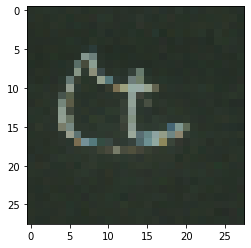

In [66]:
plt.imshow(images[0].transpose(1,2,0))

In [60]:
import pandas as pd

In [74]:
# load label from csv
csv_path = Path('../Assignment4-Materials/NumtaDB_with_aug/training-a.csv')
dataframe = pd.read_csv(csv_path)

In [75]:
# take first 100 digits
datafram_head = dataframe[:100]

In [77]:
y = np.array(datafram_head['digit'])

In [79]:
y.shape

(100,)

In [80]:
np.eye(10)[y].astype(int)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0,